In [1]:
import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import peakutils
import scipy
from scipy import fft
from scipy import signal
from scipy import integrate
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
import warnings
import random
import math
from math import pi
import seaborn as sns
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
import warnings
from time import process_time
from matplotlib import cm
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Arial'})

# sampling frequencies of the sensors used for data acquistion
sampling_vibration = 50000
sampling_acoustic = 1000

import functions
import one_trial_functions

In [2]:
data = h5py.File(r'M:\THESIS_IPT\MRIDUL\Versuche\vibration_data1\06.h5', 'r')
for key in data.keys():
    print(key)

acq_0_MCI42__AnalogInputs_AI1
acq_0_MCI42__AnalogInputs_AI2
acq_0_MCI42__AnalogInputs_AI3
acq_0_MCI42__General_Signals_TriaLinkTimestamp
acq_1_MCI42__AnalogInputsHS_RawHS1[0]
acq_1_MCI42__General_Signals_TriaLinkTimestamp
ads_ApparentPower1
ads_ApparentPower2
ads_ApparentPower3
ads_Freq1
ads_Freq2
ads_Freq3
ads_PeakI_1
ads_PeakI_2
ads_PeakI_3
ads_Phi1
ads_Phi2
ads_Phi3
ads_RMS_I_1
ads_RMS_I_2
ads_RMS_I_3
ads_RMS_U_1
ads_RMS_U_2
ads_RMS_U_3
ads_SumActivePower
ads_SumApparentPower
ads_SumReactivePower
ads_SumReactivePower1
ads_TimeStamps


In [3]:
Vibration_X=data['acq_0_MCI42__AnalogInputs_AI1'][:] / 0.0967 #Coefficients depends on the sensor, converts the digital signal values to a physical unit 
Vibration_Y=data['acq_0_MCI42__AnalogInputs_AI2'][:] / 0.0968
Vibration_Z=data['acq_0_MCI42__AnalogInputs_AI3'][:] / 0.0947

AE_temp=data['acq_1_MCI42__AnalogInputsHS_RawHS1[0]'][:]

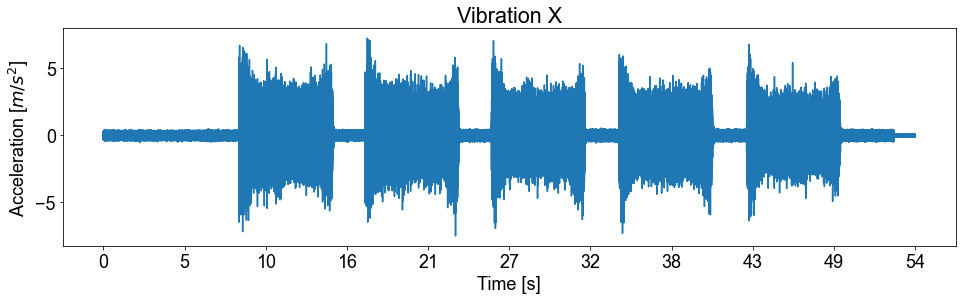

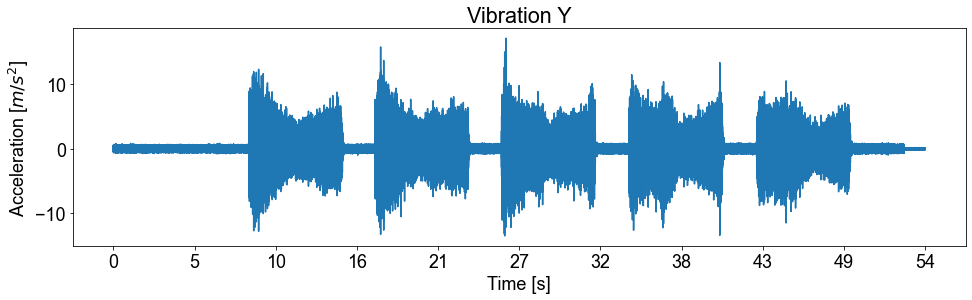

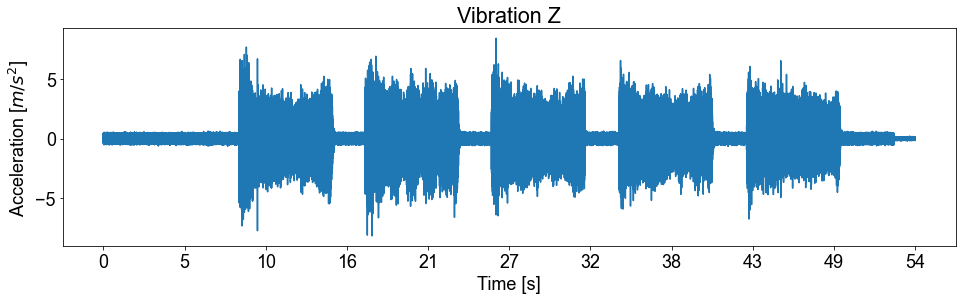

In [4]:
xticks = list(np.linspace(0, Vibration_X.shape[0], 11, endpoint = True))  #Creates 11 equidistant ticks in range of Vibration signal (beginning to end)
#xlabels = tuple([(i / 50000).round(2) for i in xticks]) 
xlabels = tuple([int(i / 50000) for i in xticks]) 


plt.figure(figsize=(16,4))
plt.plot(Vibration_X)
plt.xlabel('Time [s]')
plt.xticks(xticks,xlabels)
plt.ylabel('Acceleration [$m/s^2$]')
plt.title('Vibration X')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_6vibx.png',bbox_inches='tight',dpi=1000)
plt.show()

plt.figure(figsize=(16,4))
plt.plot(Vibration_Y)
plt.xlabel('Time [s]')
plt.xticks(xticks,xlabels)
plt.ylabel('Acceleration [$m/s^2$]')
plt.title('Vibration Y')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_6viby.png',bbox_inches='tight',dpi=1000)
plt.show()

plt.figure(figsize=(16,4))
plt.plot(Vibration_Z)
plt.xlabel('Time [s]')
plt.xticks(xticks,xlabels)
plt.ylabel('Acceleration [$m/s^2$]')
plt.title('Vibration Z')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_6vibz.png',bbox_inches='tight',dpi=1000)
plt.show()

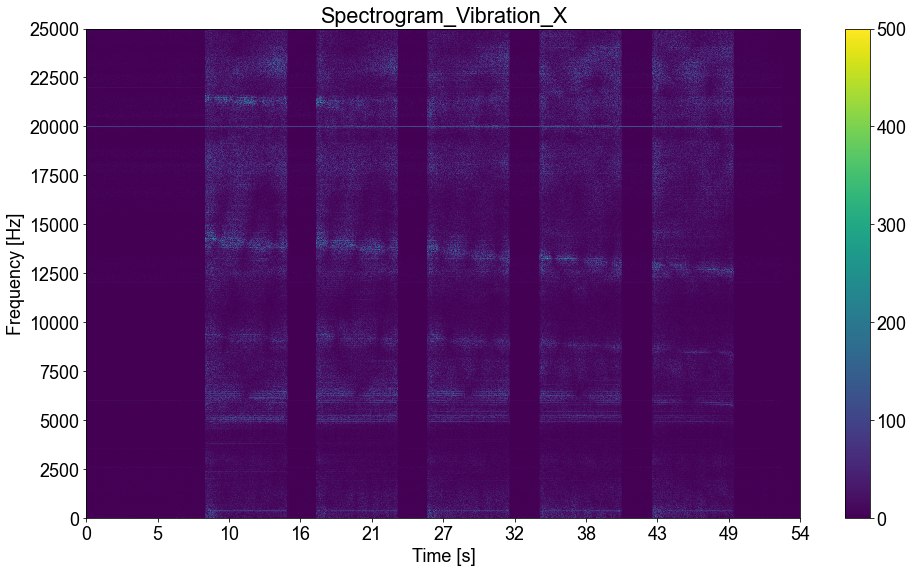

freqency shape (500,)
amplitude shape (500,)
signal shape (2738, 500)


(array([[ 4,  0,  2, ...,  1,  3,  4],
        [ 3,  2,  1, ...,  3, 13,  6],
        [ 4,  2,  0, ...,  3,  4,  2],
        ...,
        [ 0,  2,  0, ...,  0,  1,  1],
        [ 3,  3,  2, ...,  0,  1,  0],
        [ 2,  3,  2, ...,  1,  1,  1]]),
 50.0)

In [5]:
one_trial_functions.temp_fft_vib(Vibration_X,'Vibration_X',1000,50000)

array([[145, 142,  47, ...,   1,   2,   2],
       [145, 163,  56, ...,   2,   2,   2],
       [146, 134,  53, ...,   2,   2,   2],
       ...,
       [145,  32,  10, ...,   2,   2,   2],
       [147,  30,  12, ...,   2,   2,   1],
       [146,  32,  11, ...,   1,   2,   1]], dtype=int16)

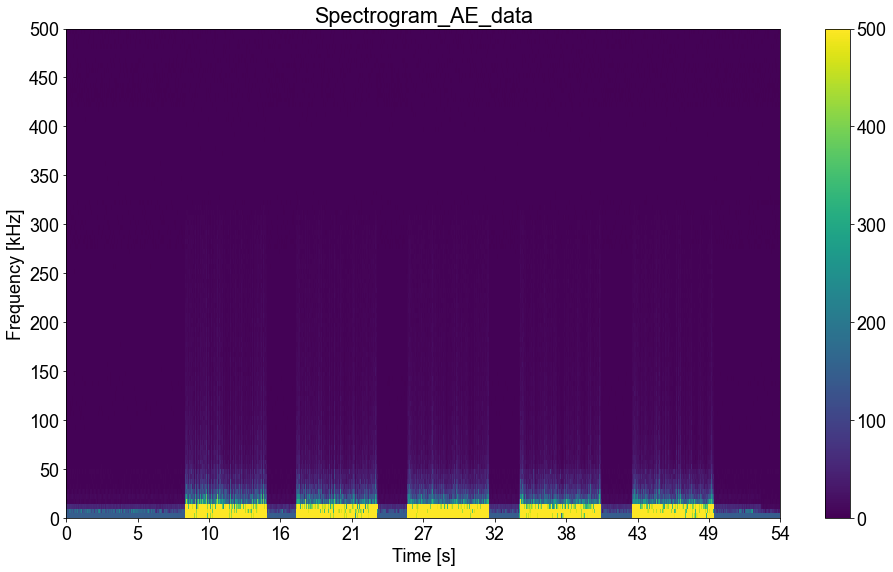

In [6]:
one_trial_functions.temp_fft_AE(AE_temp, 1000)

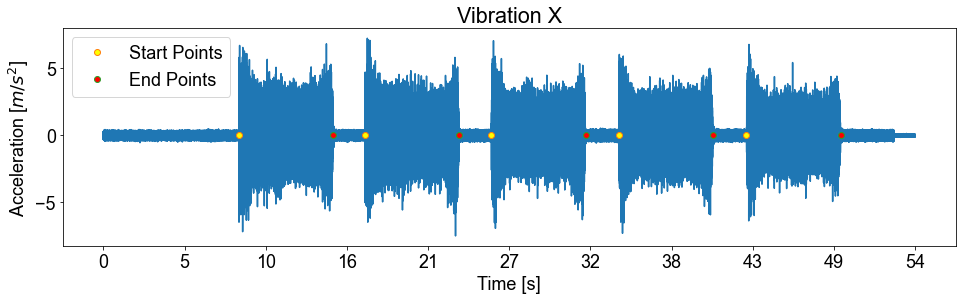

In [7]:
combined_vibration = []
combined_vibration.append(Vibration_X)
combined_vibration.append(Vibration_Y)
combined_vibration.append(Vibration_Z)

ind_start, ind_end = functions.milling_ind(combined_vibration[0], int_size = 1000, cutoff = 1)

xticks = list(np.linspace(0, Vibration_X.shape[0], 11, endpoint = True))  #Creates 11 equidistant ticks in range of Vibration signal (beginning to end)
xlabels = tuple([int(i / 50000) for i in xticks]) 

y_axis=[0,0,0,0,0]
plt.figure(figsize = (16, 4))
plt.plot(combined_vibration[0])
plt.plot(ind_start,y_axis,'o',linestyle='None',markerfacecolor='yellow', label='Start Points')
plt.plot(ind_end,y_axis,'o',linestyle='None',markerfacecolor='red', label='End Points')
plt.xlabel('Time [s]')
plt.xticks(xticks,xlabels)
plt.ylabel('Acceleration [$m/s^2$]')
plt.title('Vibration X')
plt.legend()
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_6vib_StartEnd.png',bbox_inches='tight', dpi=1000)
plt.show()

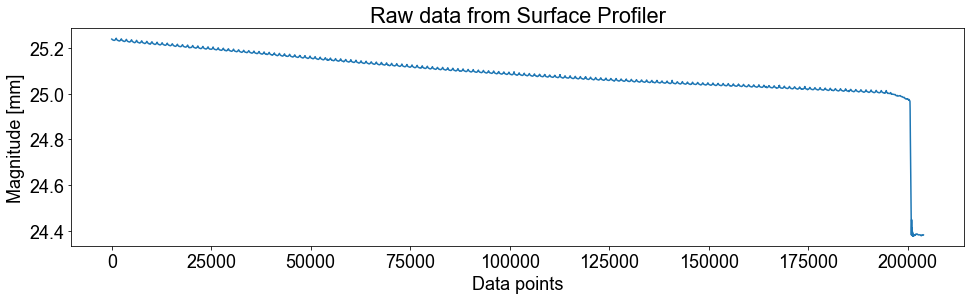

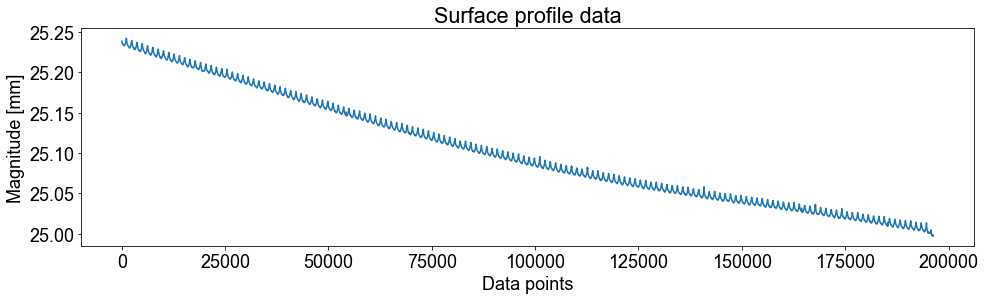

In [9]:
filename_surface = r'M:\THESIS_IPT\MRIDUL\surface_data_WZL\layer1\Part03_Line3.txt'

#extracting data corresponding to workpeice surface
measure_points, surf_profile = one_trial_functions.extract_surface(filename_surface)

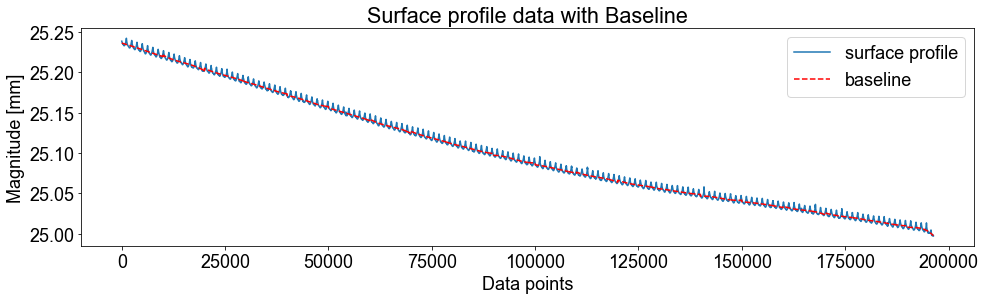

In [10]:
baseline = functions.generate_baseline(win=9999, surface=surf_profile)

plt.figure(figsize = (16, 4))
plt.plot(surf_profile)
plt.plot(baseline, '--r')
plt.legend(['surface profile', 'baseline'])
plt.xlabel('Data points')
plt.ylabel('Magnitude [mm]')
plt.title('Surface profile data with Baseline')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_3_3_surface_baseline.png',bbox_inches='tight',dpi=1000)
plt.show()

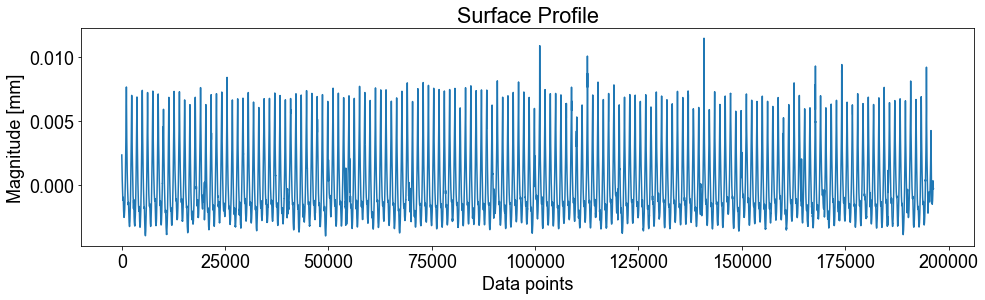

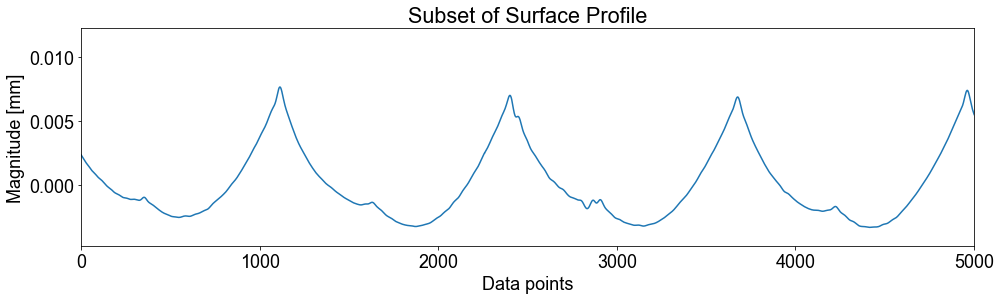

In [11]:
# taking difference
diff = (surf_profile - baseline)
plt.figure(figsize = (16, 4))
plt.plot((diff))
plt.xlabel('Data points')
plt.ylabel('Magnitude [mm]')
#plt.xlim(0,5000)
plt.title('Surface Profile')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_3_3_surfaceprofile.png',bbox_inches='tight',dpi=1000)
plt.show()


plt.figure(figsize = (16, 4))
plt.plot((diff))
plt.xlabel('Data points')
plt.ylabel('Magnitude [mm]')
plt.xlim(0,5000)
plt.title('Subset of Surface Profile')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_3_3_surfaceprofile_subset.png',bbox_inches='tight',dpi=1000)
plt.show()

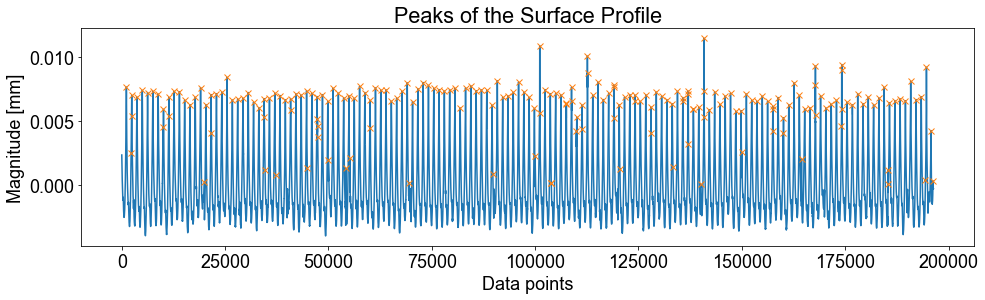

Mean peak value = 0.006185214024697777


In [12]:
# finding peaks
peaks,_ = find_peaks(diff, height=0.0001)
plt.figure(figsize = (16, 4))
plt.plot((diff))
plt.plot(peaks, diff[peaks],'x')
plt.xlabel('Data points')
plt.ylabel('Magnitude [mm]')
plt.title('Peaks of the Surface Profile')
#plt.savefig(r'M:\THESIS_IPT\REPORT\images\1_3_3_surfaceprofile_MPV.png',bbox_inches='tight',dpi=1000)
plt.show()

# computing average of peak values
avg_peak = diff[peaks].mean()
print('Mean peak value =',avg_peak)